## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## February 21, 2018: Introduction to R and statistics (part 1 of 2)

Administrivia:

- HW 4 has been returned.
- The solution set for HW 5 has been distributed.
- The final project will be assigned shortly (target: end of this week). Look for a folder called `assignments/2018-03-16` for both parts.

### The R Project

The [R Project](https://www.r-project.org/) (or just "R" for short) is an open-source project which provides a full programming environment for scientific computation. Although in principle it provides comparable functionality to Mathematica, MATLAB, and Sage, it has become entrenched primarily as a tool for statistics. (It started out as an open-source clone of a system called "S".)

According to [this index](https://www.tiobe.com/tiobe-index/) based on search results, as of this writing R is among the top 15 most widely used programming languages worldwide. It ranks behind Java, C, C++, and Python, but somewhat ahead of MATLAB.

There is a massive R ecosystem; the [Comprehensive R Archive Network](https://cloud.r-project.org/) currently lists more than 12000 packages! The CoCalc installation of R includes some of these packages without any extra download required.

**Warning:** I am neither a statistician nor a frequent R user. Please bear with me!

### Accessing R from Jupyter

There are several ways to access R from Jupyter. If you are using R by itself, then your best bet is to set the kernel to "R (R Project)". Try this now.

In [4]:
cat("Hello world\n")
cat("Me too")
cat("Me three")


Hello world


Me too

Me three

In [1]:
x <- c(2,3,4) # Assignment; by the way, comments start with # just like in Python

In [5]:
x

2 
 3 
 4

In [6]:
mean(x)

3

In [7]:
sd(x)

1

The following is an example from the [datasets package](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html), which is a collection of data sets. This is an incredible resource for practicing basic concepts of statistics!

In [9]:
sunspots

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1749  58.0  62.6  70.0  55.7  85.0  83.5  94.8  66.3  75.9  75.5 158.6  85.2
1750  73.3  75.9  89.2  88.3  90.0 100.0  85.4 103.0  91.2  65.7  63.3  75.4
1751  70.0  43.5  45.3  56.4  60.7  50.7  66.3  59.8  23.5  23.2  28.5  44.0
1752  35.0  50.0  71.0  59.3  59.7  39.6  78.4  29.3  27.1  46.6  37.6  40.0
1753  44.0  32.0  45.7  38.0  36.0  31.7  22.2  39.0  28.0  25.0  20.0   6.7
1754   0.0   3.0   1.7  13.7  20.7  26.7  18.8  12.3   8.2  24.1  13.2   4.2
1755  10.2  11.2   6.8   6.5   0.0   0.0   8.6   3.2  17.8  23.7   6.8  20.0
1756  12.5   7.1   5.4   9.4  12.5  12.9   3.6   6.4  11.8  14.3  17.0   9.4
1757  14.1  21.2  26.2  30.0  38.1  12.8  25.0  51.3  39.7  32.5  64.7  33.5
1758  37.6  52.0  49.0  72.3  46.4  45.0  44.0  38.7  62.5  37.7  43.0  43.0
1759  48.3  44.0  46.8  47.0  49.0  50.0  51.0  71.3  77.2  59.7  46.3  57.0
1760  67.3  59.5  74.7  58.3  72.0  48.3  66.0  75.6  61.3  50.6  59.7  61.0

In [0]:
plot?

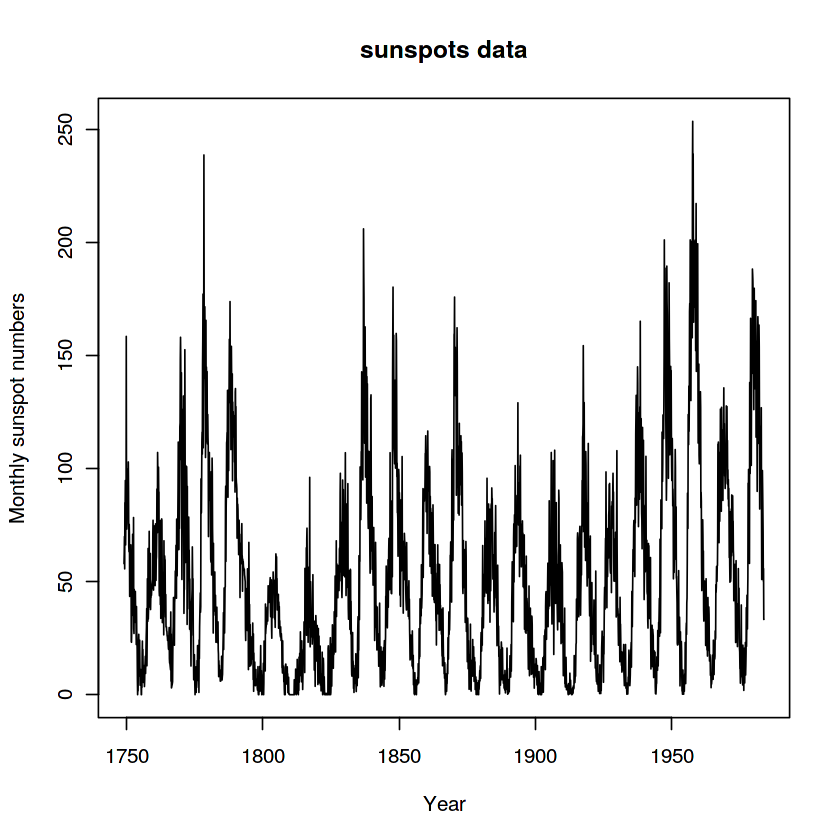

In [8]:
plot(sunspots, main = "sunspots data", xlab = "Year", ylab = "Monthly sunspot numbers")

If you are using Python, you can use the [rpy2 package](https://rpy2.readthedocs.io/). This allows you to perform R operations "within Python", so that you can migrate results in and out of Python. (Note: rpy2 is not included in a standard Python install, but CoCalc provides it.)

In [2]:
import rpy2.robjects as robjects

In [3]:
x = robjects.r("c(2,3,4)")  # Run an R command directly

In [4]:
x

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f335bdb3758 / R:0x77b43c0>
[2.000000, 3.000000, 4.000000]

In [5]:
robjects.r.mean(x) # Apply an R command to an R object

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f335bdbe050 / R:0x78997b8>
[3.000000]

In [6]:
robjects.r.sd(x)

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f335bae3368 / R:0x78a70a8>
[1.000000]

This isn't a perfect solution, though.

In [7]:
robjects.r.plot(sunspots, main = "sunspots data", xlab = "Year", ylab = "Monthly sunspot numbers") # This won't work.

NameError: name 'sunspots' is not defined

In [8]:
robjects.r.plot(robjects.r.sunspots, main = "sunspots data", xlab = "Year", ylab = "Monthly sunspot numbers") # This "works" but we can't see the result.

rpy2.rinterface.NULL

One can easily transfer information from an R array into Python, using Python syntax.

In [9]:
x[1] # Use Python syntax to index into an R array

3.0

In [10]:
len(robjects.r.sunspots)

2820

It's not quite as obvious how to go the other way...

In [11]:
robjects.r([1,2,3])

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:1:1: unexpected '['
1: [
    ^

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:1:1: unexpected '['
1: [
    ^


In [12]:
import numpy

In [13]:
robjects.r(numpy.array([2,3,4]))

RRuntimeError: Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:1:1: unexpected '['
1: [
    ^


In [14]:
robjects.r(x) # This won't work.

ValueError: Error raised when calling str() for element 0.

... because R needs a bit more coaching than Python.

In [15]:
robjects.FloatVector([2,3,5])

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f3357ff5680 / R:0x75e2438>
[2.000000, 3.000000, 5.000000]

In [0]:
robjects.DataFrame?

This should all work in SageMath also. Try switching the kernel to "SageMath 8.1" and see for yourself!

rpy2 also provides a gadget that lets you switch back and forth between Python and R at the level of individual cells.


In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
y <- c(2,3,4)
sd(y)

[1] 1


In [3]:
y

NameError: name 'y' is not defined

In [4]:
import rpy2.robjects as robjects

In [6]:
x = robjects.r.y
x

array([ 2.,  3.,  4.])

In [7]:
robjects.r.mean(x)

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fad0e815a28 / R:0x6ab8348>
[3.000000]

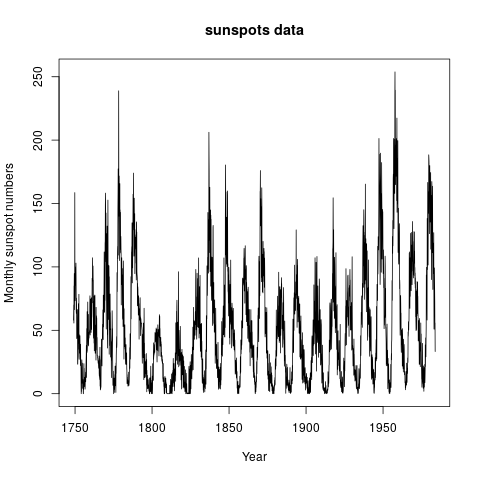

In [8]:
%%R
plot(sunspots, main = "sunspots data", xlab = "Year", ylab = "Monthly sunspot numbers") # Will this work?

There is also a version of this where one switches into R for a **single line** of code.

In [9]:
%R y = c(2,3,4,5) # This is an R command...

robjects.r.mean(robjects.r.y) # ... but this is a Python command!

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fad05901128 / R:0x6fdd748>
[3.500000]

Within Sage, there is yet another option: Sage's [own interface to R](https://doc.sagemath.org/html/en/reference/interfaces/sage/interfaces/r.html). If your kernel is not currently "SageMath 8.1", switch it now.

In [10]:
r # This is a predefined object in Sage!

R Interpreter

In [0]:
r?

If you assign `r` as a variable name, you will of course lose the predefined value. But there is another way to get a hold of it...

In [12]:
sage.interfaces.r.r is r

True

In [13]:
r('x <- c(2,3,4)')
r('x')

[1] 2 3 4

In [14]:
x = r('c(2,3,4)'); x

[1] 2 3 4

In [15]:
x = r([2,3,4]); x # Sage's R interface is smarter about conversions.

[1] 2 3 4

In [17]:
r.mean(x)

[1] 3

In [18]:
x.mean() # Sage's R objects have methods!

[1] 3

In [19]:
x.sd()

[1] 1

In [20]:
s = r('sunspots')

In [21]:
s

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1749  58.0  62.6  70.0  55.7  85.0  83.5  94.8  66.3  75.9  75.5 158.6  85.2
1750  73.3  75.9  89.2  88.3  90.0 100.0  85.4 103.0  91.2  65.7  63.3  75.4
1751  70.0  43.5  45.3  56.4  60.7  50.7  66.3  59.8  23.5  23.2  28.5  44.0
1752  35.0  50.0  71.0  59.3  59.7  39.6  78.4  29.3  27.1  46.6  37.6  40.0
1753  44.0  32.0  45.7  38.0  36.0  31.7  22.2  39.0  28.0  25.0  20.0   6.7
1754   0.0   3.0   1.7  13.7  20.7  26.7  18.8  12.3   8.2  24.1  13.2   4.2
1755  10.2  11.2   6.8   6.5   0.0   0.0   8.6   3.2  17.8  23.7   6.8  20.0
1756  12.5   7.1   5.4   9.4  12.5  12.9   3.6   6.4  11.8  14.3  17.0   9.4
1757  14.1  21.2  26.2  30.0  38.1  12.8  25.0  51.3  39.7  32.5  64.7  33.5
1758  37.6  52.0  49.0  72.3  46.4  45.0  44.0  38.7  62.5  37.7  43.0  43.0
1759  48.3  44.0  46.8  47.0  49.0  50.0  51.0  71.3  77.2  59.7  46.3  57.0
1760  67.3  59.5  74.7  58.3  72.0  48.3  66.0  75.6  61.3  50.6  59.7  61.0

In [22]:
len(s)

2820

In [23]:
r.plot(s, main = "sunspots data", xlab = "Year", ylab = "Monthly sunspot numbers") # Will this work?

null device 
          1

Did that actually fail? Check your file directory.

In [24]:
%%R

write.csv(sunspots, file = "sunspots.csv")

In [25]:
import pandas as pd

In [26]:
sunspots = pd.read_csv("sunspots.csv")

In [29]:
type(sunspots)

<class 'pandas.core.frame.DataFrame'>

In [28]:
sunspots.describe()

,Unnamed: 0,x
count,2820.000000,2820.000000
mean,1410.500000,51.265957
std,814.208204,43.448971
min,1.000000,0.000000
25%,705.750000,15.700000
50%,1410.500000,42.000000
75%,2115.250000,74.925000
max,2820.000000,253.800000


In [32]:
sunspots.iloc(1)

ValueError: No axis named 1 for object type <class 'pandas.core.frame.DataFrame'>

In [0]:
sunspots.plot(y='x')